## Introduction

The k-nearest neighbor (KNN) algorithm, a cornerstone in the field of machine learning, has its origins in the early concepts of non-parametric methods in statistics, emerging in the 1950s as one of the simplest yet effective techniques for pattern recognition and data classification. Formally introduced and framed by Thomas Cover and Peter Hart in 1967, KNN has since evolved significantly, expanding its theoretical framework and practical applications. Initially, its widespread adoption was hampered by computational limitations, as it required extensive data storage and processing capabilities. However, with the advent of advanced computing in the late 20th and early 21st centuries, KNN gained momentum, aided by more efficient algorithms for nearest neighbor searches like KD-trees and ball trees. This resurgence saw KNN being applied in diverse fields ranging from finance and healthcare to technology, often in hybrid forms combined with other machine learning techniques. Despite challenges in scalability and efficiency with large datasets, KNN's intuitive nature and versatility in both classification and regression tasks have ensured its enduring relevance. As machine learning continues to evolve, KNN remains a vital tool, with ongoing research focused on enhancing its applicability and efficiency, particularly in the context of big data and complex, hybrid models.

The MNIST dataset is an iconic benchmark in the field of machine learning, particularly in the realm of image recognition and classification. This dataset comprises 70,000 images of handwritten digits (0 through 9), each of which is a 28x28 pixel grayscale image. Developed from a mix of American Census Bureau employees and American high school students' handwriting, the dataset was created by Yann LeCun, Corinna Cortes, and Christopher J.C. Burges in the late 1990s. It serves as a simplified and cleaned-up version of the original NIST datasets.

The importance of the MNIST dataset in machine learning cannot be overstated. It has become a standard for evaluating and benchmarking algorithms in image processing and computer vision. The simplicity of the dataset makes it an excellent starting point for teaching machine learning concepts, as the data is straightforward to understand and manipulate, yet complex enough to provide meaningful learning and experimentation opportunities.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
def load_data(filename):
    return pd.read_csv(filename)

# Display function for showing one image per class (digit)
def display_sample_per_class(data):
    fig, axes = plt.subplots(1, 10, figsize=(15, 1.5))

    for digit in range(10):
        sample_image = data[data.iloc[:, 0] == digit].iloc[0, 1:].values.reshape(28, 28)
        axes[digit].imshow(sample_image, cmap='gray')
        axes[digit].set_title(f'Digit: {digit}')
        axes[digit].axis('off')

    plt.tight_layout()
    plt.show()

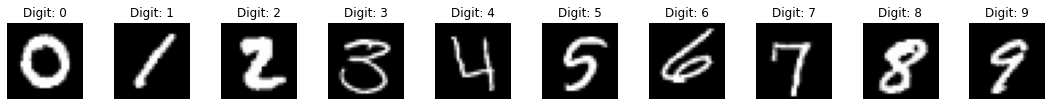

In [13]:
mnist_data = load_data('..\data\data_mnist.csv')
display_sample_per_class(mnist_data)

In [16]:
X = mnist_data.iloc[:, 1:]  # all rows, all columns except the first column (pixel values)
y = mnist_data.iloc[:, 0]   # all rows, only the first column (label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

>**Exercise 2-1:** Your goal for this exercise is to try to find the optimal k value for a kNN classifier on the MNIST dataset. Perform the following steps to find out.
>1. Use the KNeighborsClassifier from sklearn.neighbors and write and excute a helper function that will plot the loss defined as plot_knn_loss which takes X_train, y_train, X_test, y_test, and max_k as parameters. Initialize an empty list to store error rates for each k.
>2. Iterate Over Range of k Values using a loop to iterate from k = 1 to k = max_k. For each k, instantiate a KNeighborsClassifier with the current k. Train the classifier using X_train and y_train. Make predictions on X_test.
Calculate the error rate (proportion of incorrect predictions) and append it to the error rates list.
>3. Plotting the Results: Use Matplotlib to plot the range of k values against the error rates. Label your axes appropriately (e.g., "Number of Neighbors k" and "Error Rate"). Add a title and a grid for better readability.


In [ ]:
max_k = 15

## Put your code below

> Given these results, is it clear where the optimal $k$ value is? 

> Answer:

>**Exercise 2-2:** Using your optimal $k$ value from Exercise 2-1, retrain the kNN classifier on the MNIST dataset. Create and execute code to construct and visualize the confusion matrix. 

In [ ]:
## Put your code below

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("Classification Report:\n", classification_report(y_test, predictions))

# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

> Given these results, do you notice any particular digits that are more frequently confused with each other? Does this match with your intuition? 

Confusion Matrix:
 [[812   0   0   0   0   0   4   0   0   0]
 [  0 906   0   0   0   0   3   0   0   0]
 [  6  15 796   3   2   2   1  20   1   0]
 [  2   4   4 900   0   9   1   6   5   6]
 [  1   5   0   0 811   0   3   1   0  18]
 [  1   2   0  15   1 669   9   0   1   4]
 [  5   0   0   0   0   3 777   0   0   0]
 [  0  18   2   0   1   0   0 857   0  15]
 [  1  12   2  12   3  15   4   1 777   8]
 [  3   3   1  10   6   1   0  12   2 800]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.94      1.00      0.97       909
           2       0.99      0.94      0.96       846
           3       0.96      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.96      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.96      0.96       893
           8       0.99      0.93      

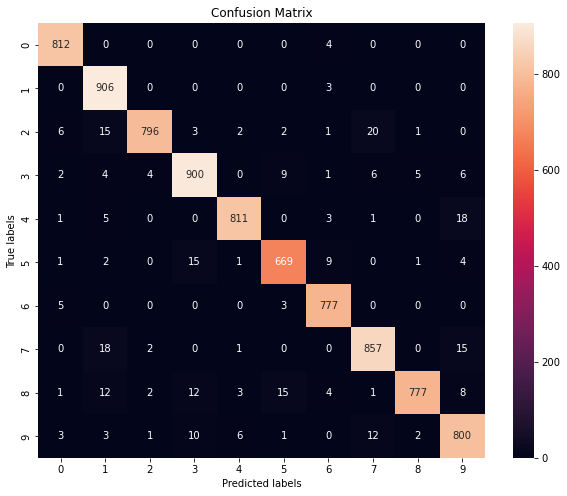

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
predictions = knn.predict(X_test)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

# Print classification report
print("Classification Report:\n", classification_report(y_test, predictions))

# Optional: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()